In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import roc_auc_score,roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

# Dependent Variable (Target Variable):

- Loan_Status

# we have to predict Loan_status

In [3]:
#fetching information of the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Most of the data contains object type data

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

we can see there are some nan values present in the data

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# checking value counts of columns

In [7]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [9]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [12]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [13]:
df.ApplicantIncome.value_counts()

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [14]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [15]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [16]:
df.Loan_ID.value_counts()

LP001640    1
LP002243    1
LP001883    1
LP001245    1
LP002237    1
           ..
LP001935    1
LP001813    1
LP002335    1
LP001345    1
LP002560    1
Name: Loan_ID, Length: 614, dtype: int64

# what we can see conclude from above is that loan ID is an Identity and unique to every datapoint hence it can be dropped as it wont serve any purpose to the prediction model

In [17]:
#drop loan id
df=df.drop(['Loan_ID'],axis=1)

# now we fill the nan values present in the data by mean for non categorical and by mode for categorical data

In [18]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
# Filling the missing values for categorical data by most frequent value of that column
df['Gender']=df['Gender'].fillna(df['Gender'].mode().iloc[0])
df['Married']=df['Married'].fillna(df['Married'].mode().iloc[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode().iloc[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0])

In [20]:
# filling the missing values for numerical data by mean 
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [21]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# we have filled all the nan values in the data by mode for categorical and by mean for non categorical data

# EDA AND VISUALIZATION

In [22]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


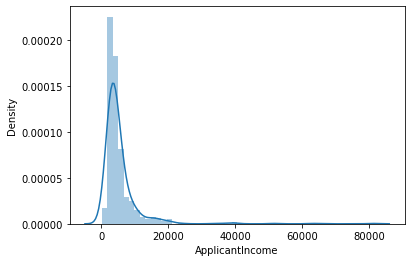

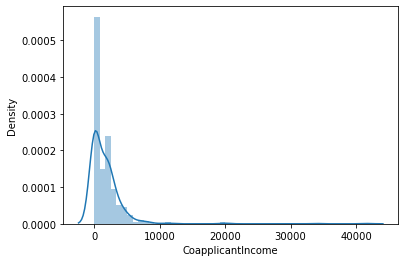

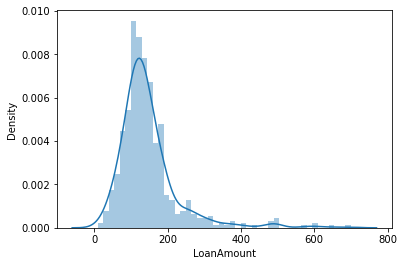

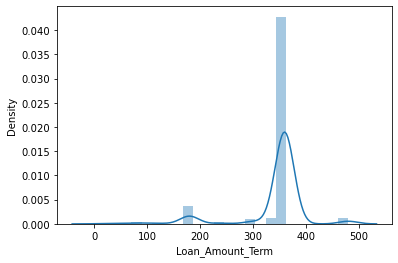

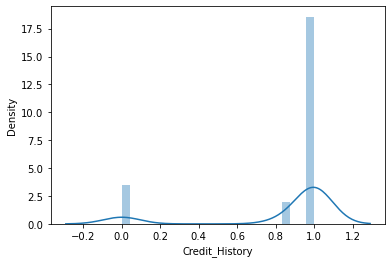

In [23]:
#checking for skewness 
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

# we can definetly see skewness present in loan amount, applicant income and coapplicant income

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

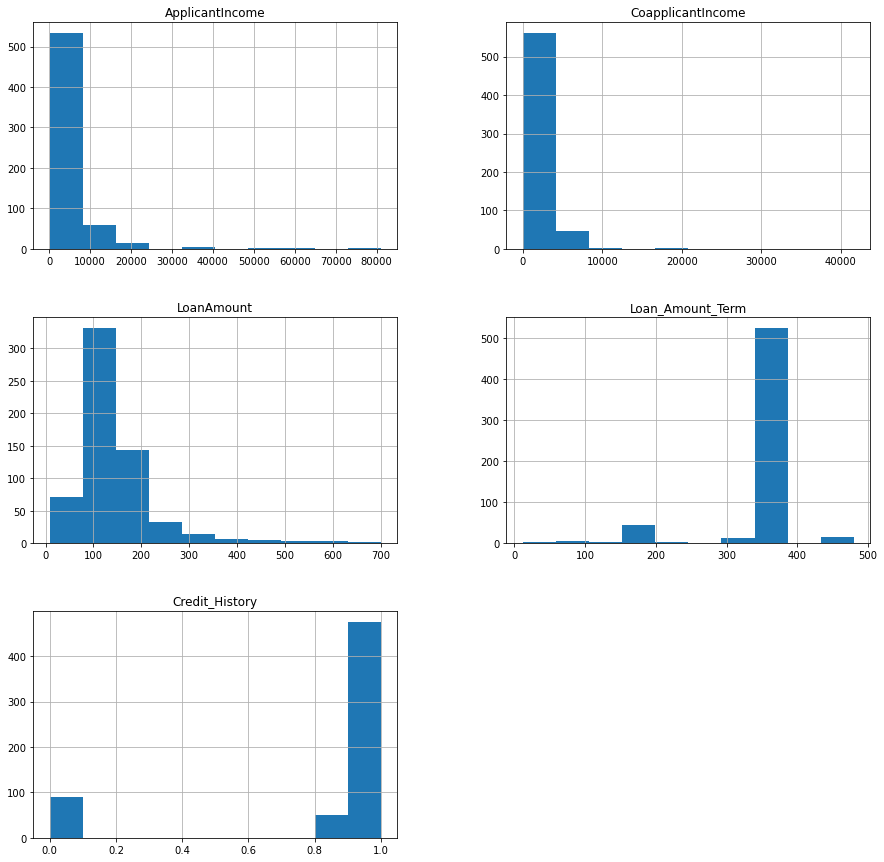

In [24]:
df.hist(figsize=(15,15))

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

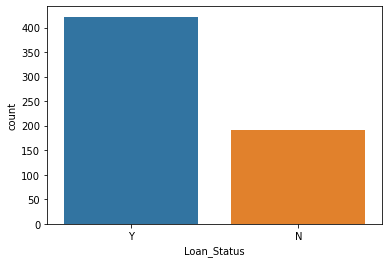

In [25]:
sns.countplot(df['Loan_Status'])

# the data is imbalance 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

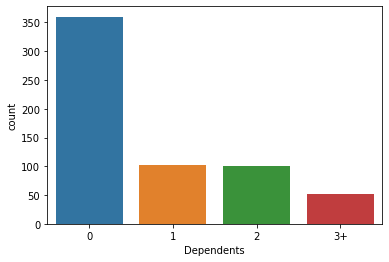

In [26]:
sns.countplot(df['Dependents'])

# applicants with 0 dependents have the highest count

<AxesSubplot:xlabel='Gender', ylabel='count'>

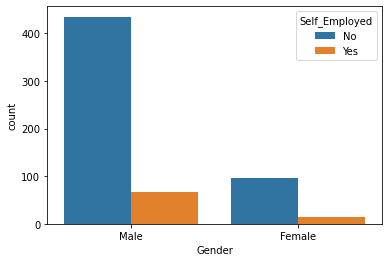

In [27]:
sns.countplot(x="Gender",hue="Self_Employed",data=df)

# we can see that self employment rate of male is higher than female

<AxesSubplot:xlabel='Dependents', ylabel='count'>

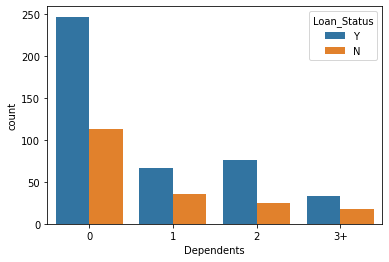

In [28]:
sns.countplot(x="Dependents",hue="Loan_Status",data=df)

# applicants with 0 dependents have higher number of acceptance

<AxesSubplot:xlabel='Gender', ylabel='count'>

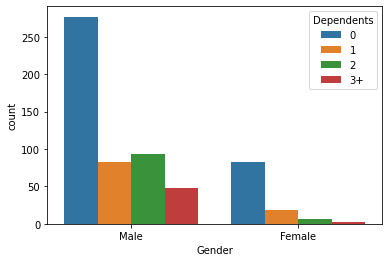

In [29]:
sns.countplot(x="Gender",hue="Dependents",data=df)

# Male have higher number of dependents compared to female

<AxesSubplot:xlabel='Education', ylabel='count'>

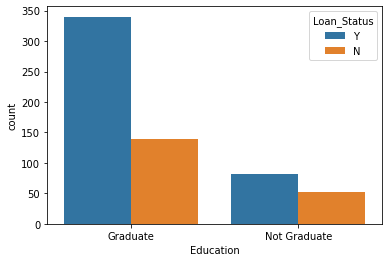

In [30]:
sns.countplot(x="Education",hue="Loan_Status",data=df)

# graduate people have higher number of acceptance

<AxesSubplot:xlabel='Gender', ylabel='count'>

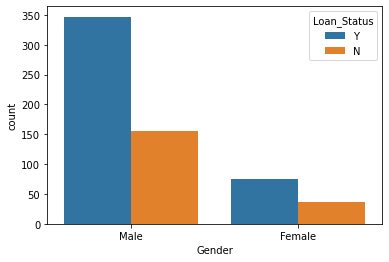

In [31]:
sns.countplot(x="Gender",hue="Loan_Status",data=df)

# Male have higher acceptance for loan than Female

# what we can conclude from the above graphs is that :-
    
# male have higher acceptance for loan as well as more qualification     compared to female

# female have less dependents compared to men 

In [32]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


# we will now use encoding to change object type data to numerical data

In [33]:
#coverting object type to numerical using label encoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])

In [34]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [35]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

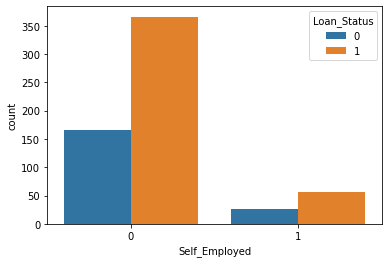

In [36]:
sns.countplot(x="Self_Employed",hue="Loan_Status",data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

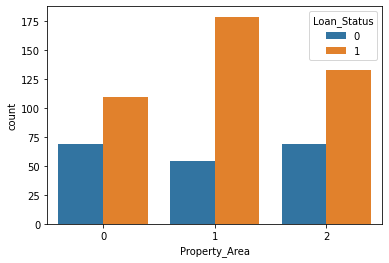

In [37]:
sns.countplot(x="Property_Area",hue="Loan_Status",data=df)

# we have converted all the object type data to numerical data

In [38]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


<AxesSubplot:>

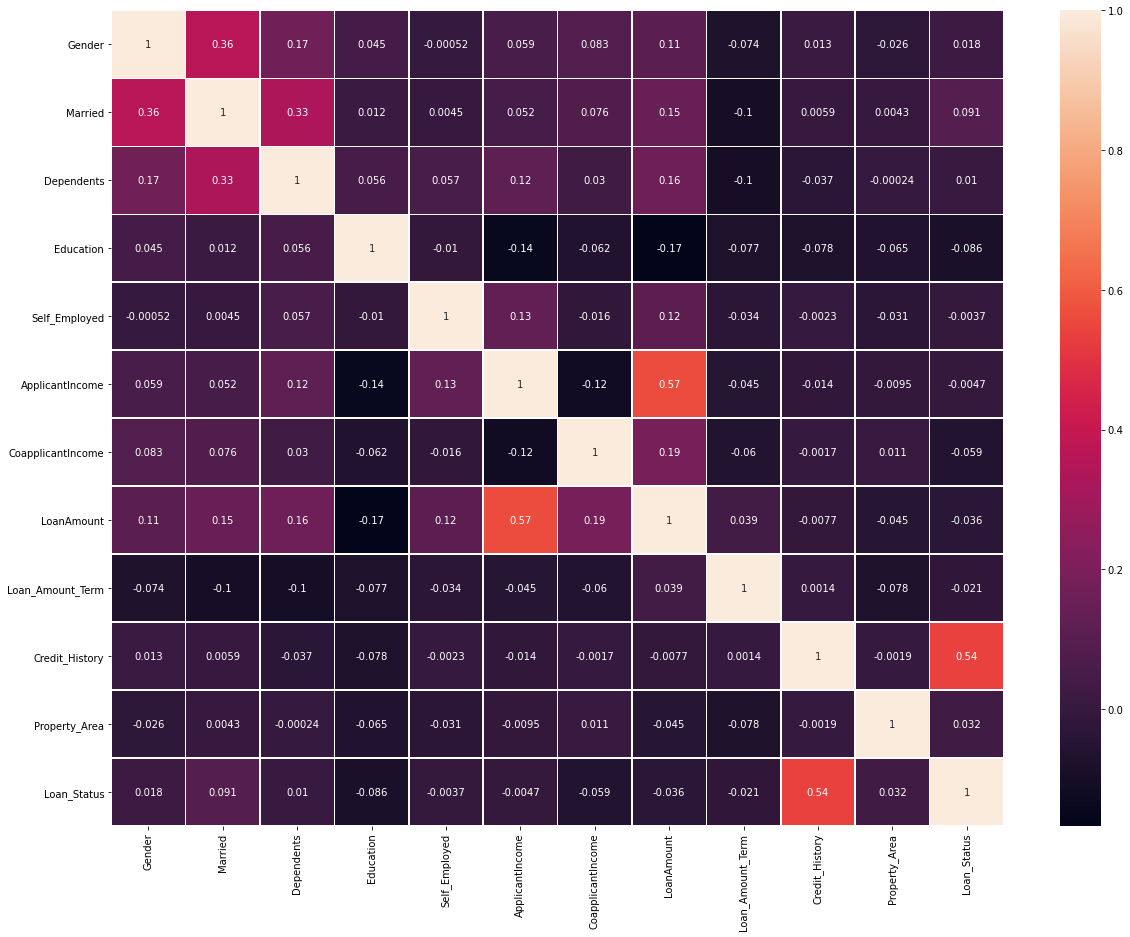

In [39]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.5)

# we can see that self employed have the lowest correlation with the loan Status


Gender                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Married              AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Dependents           AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Education            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Self_Employed        AxesSubplot(0.656429,0.536818;0.110714x0.343182)
ApplicantIncome      AxesSubplot(0.789286,0.536818;0.110714x0.343182)
CoapplicantIncome          AxesSubplot(0.125,0.125;0.110714x0.343182)
LoanAmount              AxesSubplot(0.257857,0.125;0.110714x0.343182)
Loan_Amount_Term        AxesSubplot(0.390714,0.125;0.110714x0.343182)
Credit_History          AxesSubplot(0.523571,0.125;0.110714x0.343182)
Property_Area           AxesSubplot(0.656429,0.125;0.110714x0.343182)
Loan_Status             AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

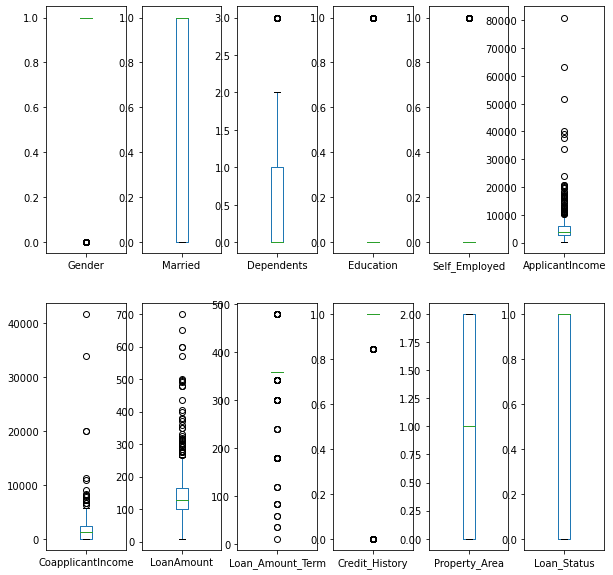

In [40]:
#checking for outliers
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

# we can see there outliers present in almost all the columns

# removing the outliers present in the Data

In [41]:
#removing outliers using zscore
from scipy.stats import zscore
z=np.abs(zscore(df))

In [42]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [43]:
df1=df[(z<3).all(axis=1)]
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [44]:
df.shape

(614, 12)

In [45]:
df1.shape

(577, 12)

In [46]:
data_loss=(614-577)/614*100
data_loss

6.026058631921824

# After removing the outliers we have 6% data loss in the data which is not more than 10% so we can move forward

# Now we balance the dataset

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

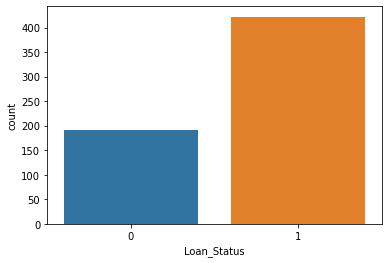

In [47]:
sns.countplot(df['Loan_Status'])

In [48]:
dfx=df1.drop(['Loan_Status'],axis=1)
dfy=df1['Loan_Status']

In [49]:
dfx

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [51]:
#balancing the data using SMOTE
sm=SMOTE()
x,y=sm.fit_resample(dfx,dfy)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

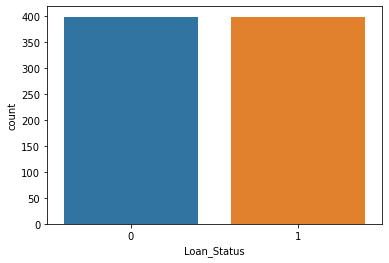

In [52]:
sns.countplot(y)

In [53]:
x.shape

(796, 11)

# we have balanced the dataset now we remove the skewness present in the data

In [54]:
x.skew()

Gender              -1.269471
Married             -0.243439
Dependents           1.230187
Education            1.650044
Self_Employed        2.783260
ApplicantIncome      2.082136
CoapplicantIncome    1.340048
LoanAmount           1.137084
Loan_Amount_Term    -2.002264
Credit_History      -1.167181
Property_Area        0.129679
dtype: float64

In [55]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [56]:
#to remove the skewness using power_transform
from sklearn.preprocessing import power_transform
x[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]=power_transform(x[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']],method='yeo-johnson')

In [59]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.550257,-1.128843,-0.766730,-0.471947,-0.322525,0.675277,-1.069561,0.312905,0.171302,0.697704,1.288952
1,0.550257,0.885863,1.058131,-0.471947,-0.322525,0.224711,0.805557,-0.030692,0.171302,0.697704,-1.250063
2,0.550257,0.885863,-0.766730,-0.471947,3.100538,-0.546860,-1.069561,-1.527665,0.171302,0.697704,1.288952
3,0.550257,0.885863,-0.766730,2.118881,-0.322525,-0.816017,0.939857,-0.190631,0.171302,0.697704,1.288952
4,0.550257,-1.128843,-0.766730,-0.471947,-0.322525,0.722633,-1.069561,0.215149,0.171302,0.697704,1.288952
...,...,...,...,...,...,...,...,...,...,...,...
791,0.550257,0.885863,-0.766730,-0.471947,-0.322525,0.667324,-1.069561,1.565290,0.171302,0.072910,1.288952
792,-1.817334,0.885863,-0.766730,-0.471947,-0.322525,0.121761,0.951599,-0.401207,0.171302,0.697704,1.288952
793,0.550257,-1.128843,-0.766730,-0.471947,-0.322525,0.863922,-1.069561,-0.238136,0.171302,-1.505849,-1.250063
794,0.550257,-1.128843,1.441229,-0.471947,-0.322525,-0.252815,-1.069561,-1.100430,-2.428726,0.697704,-1.250063


# we are done with EDA and cleansing

# we have removed the skewness now we need to scale the data

# Feature Scaling

In [57]:
#using standard scaler for scaling the non-categorical data
sc=StandardScaler()
x[['ApplicantIncome','CoapplicantIncome','LoanAmount']] = sc.fit_transform(x[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

# we have scaled the data using standard scaler

# PCA

In [58]:
for i in range(2,11):
    pc=PCA(n_components=i)
    principalcomponents=pc.fit_transform(x)
    print(i,sum(pc.explained_variance_ratio_))

2 0.32841400392665987
3 0.4378939411824487
4 0.5378798462113401
5 0.6272001727031757
6 0.7117006823838701
7 0.7916945815721368
8 0.8630083606629951
9 0.9287411379089251
10 0.9728186984280304


# Building Models

In [60]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier() 
svc=SVC()
abc=AdaBoostClassifier()
gb=GradientBoostingClassifier()
rd=RidgeClassifier()
sgdc=SGDClassifier()

model=[lg,dtc,knn,rfc,svc,abc,gb,rd,sgdc]

In [64]:
#testing the models and checking their accuracy, cross_val_score as well as roc_auc-score
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)
for m in model:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    pred=m.predict(xtest)
    print('Accuracy score of ',m,'is :')
    print(accuracy_score(ytest,pred))
    score=cross_val_score(m,x,y,cv=5).mean()    
    print('cross_val score :',score)
    print(confusion_matrix(ytest,pred))
    print(classification_report(ytest,pred))
    print('roc auc score :',roc_auc_score(ytest,pred))
    print('\n')

Accuracy score of  LogisticRegression() is :
0.78125
cross_val score : 0.7777044025157233
[[57 25]
 [10 68]]
              precision    recall  f1-score   support

           0       0.85      0.70      0.77        82
           1       0.73      0.87      0.80        78

    accuracy                           0.78       160
   macro avg       0.79      0.78      0.78       160
weighted avg       0.79      0.78      0.78       160

roc auc score : 0.783458411507192


Accuracy score of  DecisionTreeClassifier() is :
0.79375
cross_val score : 0.7777358490566038
[[68 14]
 [19 59]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80        82
           1       0.81      0.76      0.78        78

    accuracy                           0.79       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.79      0.79      0.79       160

roc auc score : 0.7928392745465915


Accuracy score of  KNeighborsClassifier() is :
0.75

# After testing all our classification models we found out that 

# Random forest classifier is the best performing model with close 85% ROC score

# after Random forest ADAboost and gradient boosting classifier is the best performing model with close to 83 % roc score

# we will hyper tune our top 2 best peroforming models and check which performs better after hypertuning


# AdaBoost classifier hypertuning

In [231]:
ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150,200],"base_estimator":[lg,knn,svc,dtc,rfc]}
gd=GridSearchCV(ada,parameters)
gd.fit(xtrain,ytrain)
print(gd.best_params_)

{'base_estimator': RandomForestClassifier(), 'learning_rate': 1, 'n_estimators': 100}


In [232]:
ada=AdaBoostClassifier(learning_rate=1,n_estimators=200,base_estimator=rfc)
ada.fit(xtrain,ytrain)
pred=ada.predict(xtest)
print('accuracy :',accuracy_score(ytest,pred))

accuracy : 0.825


In [63]:
ada=AdaBoostClassifier(learning_rate=1,n_estimators=200,base_estimator=rfc)
ada.fit(x,y)
pred=ada.predict(x)
print('accuracy :',accuracy_score(y,pred))

accuracy : 1.0


# gradient boosting classifier hypertuning

In [234]:
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x,y)
print(gd.best_params_)

{'learning_rate': 0.1, 'n_estimators': 50}


In [235]:
gbc=GradientBoostingClassifier(learning_rate=0.1,n_estimators=50)
gbc.fit(xtrain,ytrain)
pred=gbc.predict(xtest)
print('accuracy :',accuracy_score(ytest,pred))

accuracy : 0.84375


In [62]:
gbc=GradientBoostingClassifier(learning_rate=0.1,n_estimators=50)
gbc.fit(x,y)
pred=gbc.predict(x)
print('accuracy :',accuracy_score(y,pred))

accuracy : 0.8693467336683417


# Random forest classifier hypertuning

In [237]:
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x,y)
print(gd.best_params_)

{'max_features': 'sqrt', 'n_estimators': 150}


In [73]:
rfc=RandomForestClassifier(max_features='sqrt',n_estimators=150)
rfc.fit(x,y)
pred=rfc.predict(x)
print('accuracy :',accuracy_score(y,pred))

accuracy : 1.0


In [69]:
rfv=RandomForestClassifier(max_features='sqrt',n_estimators=150)
rfc.fit(xtrain,ytrain)
pred=rfc.predict(xtest)
print('accuracy :',accuracy_score(ytest,pred))

accuracy : 0.8625


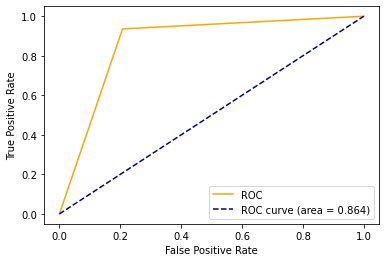

In [70]:
fpr, tpr, threshold = roc_curve(ytest,pred)
auc = roc_auc_score(ytest,pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# we can conclude that our best performing model is Random forest Classifier

In [71]:
x['predicted']=rfc.predict(x)

<AxesSubplot:xlabel='predicted', ylabel='Density'>

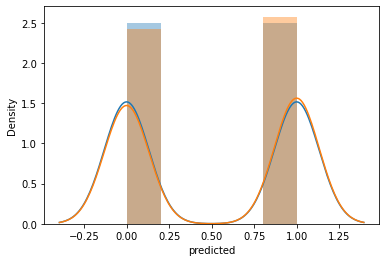

In [72]:
sns.distplot(y)
plt.show
sns.distplot(x['predicted'])

# Saving the model

In [251]:
joblib.dump(rfc,'loan_status.obj')

['loan_status.obj']